In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('email_classification.csv')

In [3]:
data.head()

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   179 non-null    object
 1   label   179 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [5]:
data.isnull().sum()

email    0
label    0
dtype: int64

# PROCESAMIENTO DE LOS DATOS

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [7]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['email'])

In [8]:
print(X)

  (0, 132)	0.35623900003810977
  (0, 75)	0.40761062411353116
  (0, 1)	0.2961380526675784
  (0, 120)	0.27481690227742267
  (0, 249)	0.3775601504282655
  (0, 257)	0.5496338045548453
  (0, 390)	0.31476386648672533
  (1, 318)	0.3706942069746988
  (1, 270)	0.40019821183150917
  (1, 188)	0.40019821183150917
  (1, 418)	0.40019821183150917
  (1, 361)	0.2907527726750828
  (1, 157)	0.40019821183150917
  (1, 150)	0.3706942069746988
  (2, 102)	0.42970294732261044
  (2, 186)	0.31218860971149204
  (2, 233)	0.42970294732261044
  (2, 45)	0.42970294732261044
  (2, 56)	0.33182393475184335
  (2, 155)	0.3755470029775254
  (2, 361)	0.31218860971149204
  (3, 167)	0.4180121806040213
  (3, 401)	0.39860646558427687
  (3, 59)	0.1619485686994428
  (3, 201)	0.4430304985496192
  :	:
  (175, 224)	0.27843202706746323
  (176, 339)	0.3855555654706203
  (176, 110)	0.3855555654706203
  (176, 246)	0.3571310674596079
  (176, 114)	0.3369635651697976
  (176, 76)	0.3571310674596079
  (176, 376)	0.2727284347853649
  (176, 326

In [9]:
data['label'] = data['label'].map({'spam':1, 'ham':0})
data['label'].head(10)

0    0
1    0
2    0
3    1
4    0
5    0
6    1
7    0
8    0
9    1
Name: label, dtype: int64

# MODELO

In [10]:
import seaborn as sns

In [11]:
Y = data['label']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_orig = X_train
X_test_orig = X_test
model = MultinomialNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print('Precision: ', accuracy_score(Y_test, predictions))

Precision:  0.9722222222222222


CROSS VALIDATION

In [13]:
cv_score = cross_val_score(model, X, Y, scoring = 'accuracy')

print('the cross validation score : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())

the cross validation score :  [0.97222222 0.97222222 0.91666667 0.91666667 0.85714286]
the mean cross validation score :  0.9269841269841269


In [14]:
y_pred_rf = model.predict(X_test)

In [15]:
confusion_matrix(Y_test, y_pred_rf)

array([[14,  0],
       [ 1, 21]], dtype=int64)

Confusion matrix, without normalization
[[14  0]
 [ 1 21]]
Normalized confusion matrix
[[1.         0.        ]
 [0.04545455 0.95454545]]


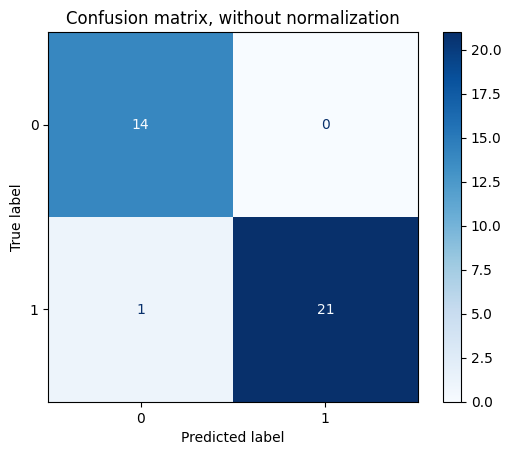

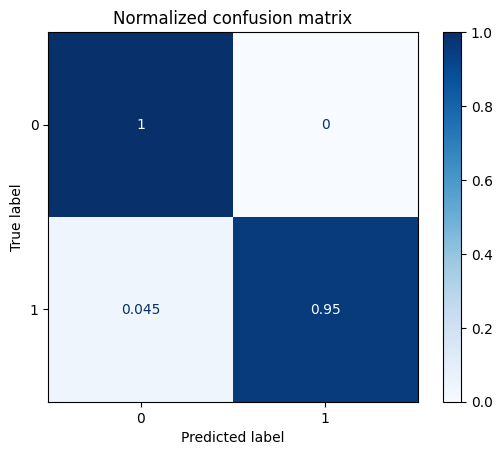

In [16]:
# Plot non-normalized confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

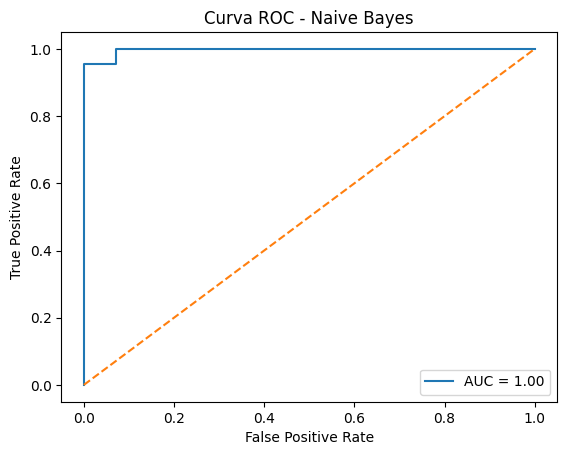

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create and fit the model
model = model = MultinomialNB()
model.fit(X_train, Y_train)

# Obtiene las probabilidades de la clase positiva (1)
y_prob = model.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calcula el AUC
auc_score = roc_auc_score(Y_test, y_prob)

# Grafica la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Línea diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Naive Bayes')
plt.legend()
plt.show()

In [18]:
dataf = pd.concat([pd.DataFrame(X_test_orig),pd.DataFrame(Y_test),pd.DataFrame(predictions),pd.DataFrame(y_prob)],axis=1)

In [19]:
dataf = dataf.drop(['label'], axis=1)
dataf.head()

,0,0,0
0,"(0, 42)\t0.42893734036092007\n (0, 408)\t0....",1.0,0.666189
1,"(0, 416)\t0.5627096847272807\n (0, 263)\t0....",1.0,0.876453
2,"(0, 321)\t0.4164101268070787\n (0, 263)\t0....",1.0,0.956359
3,"(0, 60)\t0.5358353765968056\n (0, 402)\t0.4...",1.0,0.602958
4,"(0, 417)\t0.5895310511371827\n (0, 69)\t0.5...",1.0,0.807704


In [20]:
dataf.columns = ['email', 'label', 'probability']

In [21]:
dataf.head()

,email,label,probability
0,"(0, 42)\t0.42893734036092007\n (0, 408)\t0....",1.0,0.666189
1,"(0, 416)\t0.5627096847272807\n (0, 263)\t0....",1.0,0.876453
2,"(0, 321)\t0.4164101268070787\n (0, 263)\t0....",1.0,0.956359
3,"(0, 60)\t0.5358353765968056\n (0, 402)\t0.4...",1.0,0.602958
4,"(0, 417)\t0.5895310511371827\n (0, 69)\t0.5...",1.0,0.807704


In [22]:
quantiles = dataf['probability'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.284379
0.4    0.439697
0.6    0.713893
0.8    0.851241
Name: probability, dtype: float64

In [23]:
dataf.to_csv('dataf.csv', index = False)

# IMPLEMENTACION

In [24]:
import pickle

In [25]:
Pkl_Filename = "classifier.pkl"

with open (Pkl_Filename, 'wb') as file:
    pickle.dump(model, file)

In [26]:

dataf['score'] = pd.cut(dataf['probability'], bins=[0,0.2,0.4,0.6,0.8,1], labels=['Muy bajo','Bajo','Medio','Alto','Muy alto'])
dataf.head(5)


,email,label,probability,score
0,"(0, 42)\t0.42893734036092007\n (0, 408)\t0....",1.0,0.666189,Alto
1,"(0, 416)\t0.5627096847272807\n (0, 263)\t0....",1.0,0.876453,Muy alto
2,"(0, 321)\t0.4164101268070787\n (0, 263)\t0....",1.0,0.956359,Muy alto
3,"(0, 60)\t0.5358353765968056\n (0, 402)\t0.4...",1.0,0.602958,Alto
4,"(0, 417)\t0.5895310511371827\n (0, 69)\t0.5...",1.0,0.807704,Muy alto
